This file contains function definitions used in all simulations

In [13]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np 
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt
from cobra.flux_analysis.loopless import loopless_solution
%load_ext autoreload



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload 2
import all_function_defs as f


In [19]:
model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml"
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] 
biomass_rxn_ID = 'BIOMASS_RT'
glc_ID = 'EX_glc__D_e'

all_fluxes = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, obj_func_ID, glc_ID)

In [20]:
all_fluxes

,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, all_fluxes, exchange_metabolites)
    

In [28]:
intr_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, all_fluxes, intr_metabolites)
acl_pho = ['XPK', 'ACITL']
ACL_phosphoketolase = f.metabolites_fluxes(model_path, all_fluxes, acl_pho)

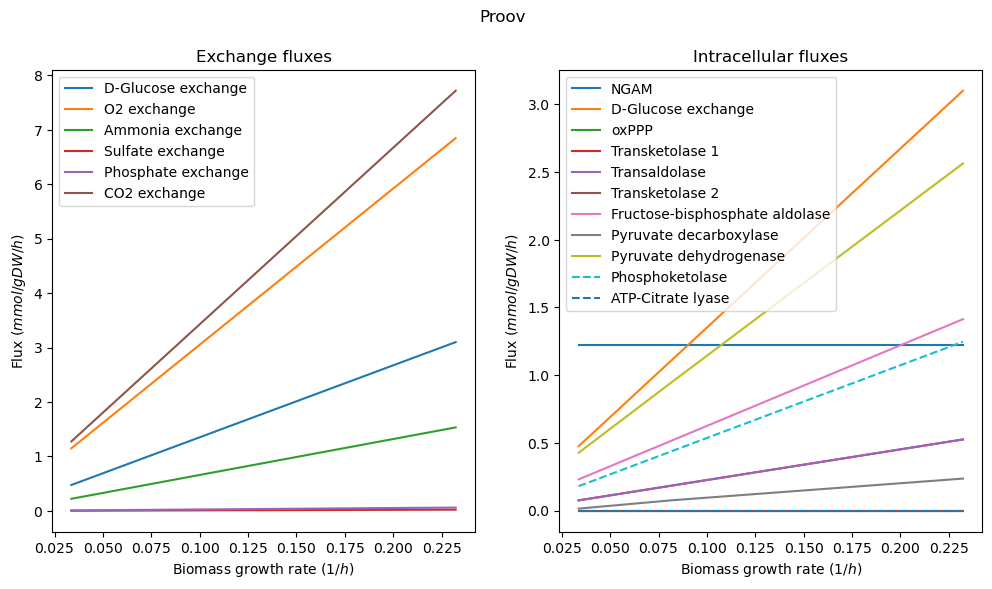

In [39]:
title = 'Proov'
biomass_rxn_ID = 'BIOMASS_RT'
f.plot_ex_intr_fluxes(all_fluxes, exchange_fluxes, intracellular_fluxes, ACL_phosphoketolase, title, biomass_rxn_ID)

In [34]:

nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i = 0


cofactor_fluxes = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i, biomass_rxn_ID, glc_ID)


SUM produced: 0.6029655918070933, SUM consumed: -0.6029655918070933


c:\Users\Maive\Desktop\BSc_loputoo\Python_scripts\all_function_defs.py:232: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


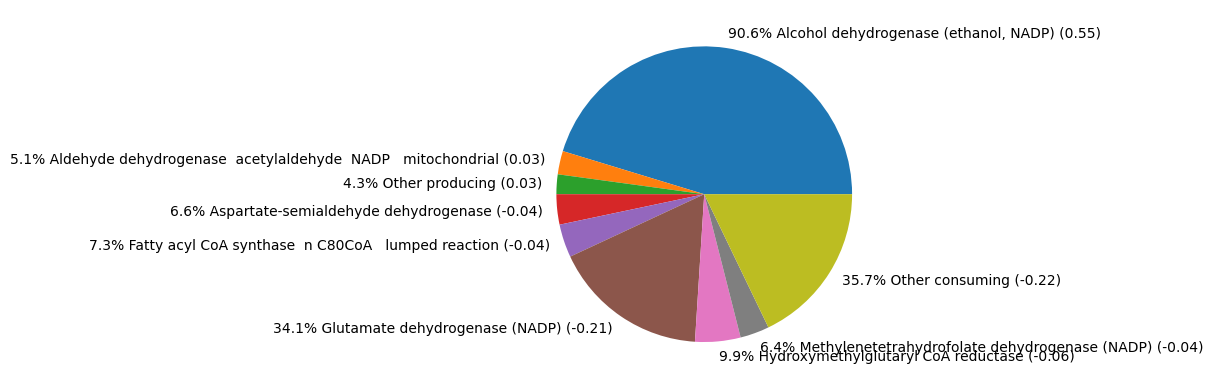

In [38]:
producing_nadph_fluxes_lowest_GR_pie_chart, fig = f.cofactor_fluxes_pie_chart(model_path, cofactor_fluxes, figsize=(13, 6))

plt.show()
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH.png")
